# 2) Explorative Datenanalyse
Daten beschreiben, Identifizierung und Verstehen von Beziehungen & Gruppen

## 2.1 Importieren der Bibliotheken

In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2.2 Daten laden

In [3]:
# Funktion zum Laden der Daten mit Fehlerüberprüfung
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Datensatz erfolgreich geladen! Form des Datensatzes: {data.shape}")
        
        # Überprüfen, ob die 'type'-Spalte vorhanden ist
        if 'type' in data.columns:
            wine_counts = data['type'].value_counts()
            print("\nAnzahl der Rot- und Weißweine im Datensatz:")
            print(wine_counts)
        else:
            print("\nDie Spalte 'type' ist nicht im Datensatz enthalten. Kann Rot- und Weißweine nicht zählen.")
        
        return data
    except FileNotFoundError:
        print("Fehler: Die angegebene Datei wurde nicht gefunden.")
    except pd.errors.ParserError:
        print("Fehler: Der Datensatz konnte nicht geparst werden. Bitte prüfen Sie die Datei.")
    except Exception as e:
        print(f"Unerwarteter Fehler: {e}")
        return None

# Lade den Datensatz
file_path = "data/raw/wine_quality_raw.csv"
data = load_data(file_path)

# Prüfen, ob die Daten geladen wurden
if data is not None:
    display(data.head())

Datensatz erfolgreich geladen! Form des Datensatzes: (6497, 13)

Anzahl der Rot- und Weißweine im Datensatz:
type
white    4898
red      1599
Name: count, dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2.3 Überblick über den Datensatz

In [4]:
def overview_data(data):
    try:
        print("\nAllgemeine Informationen über den Datensatz:")
        data.info()
        print("\nStatistische Übersicht:")
        display(data.describe())
    except Exception as e:
        print(f"Fehler bei der Übersicht des Datensatzes: {e}")

if data is not None:
    overview_data(data)


Allgemeine Informationen über den Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Statistische Übe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 2.4 Fehlende Werte überprüfen

In [5]:
# Überprüfen auf fehlende Werte
def check_missing_values(data):
    try:
        missing_values = data.isnull().sum()
        print("\nAnzahl fehlender Werte pro Spalte:")
        display(missing_values)
        
        # Überprüfen, ob fehlende Werte vorhanden sind
        if missing_values.sum() > 0:
            print("\nVisualisierung der fehlenden Werte:")
            plt.figure(figsize=(10, 6))
            sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
            plt.title("Visualisierung fehlender Werte")
            plt.show()
        else:
            print("\nEs gibt keine fehlenden Werte im Datensatz.")
    except Exception as e:
        print(f"Fehler bei der Überprüfung auf fehlende Werte: {e}")

# Aufruf der Funktion
if data is not None:
    check_missing_values(data)



Anzahl fehlender Werte pro Spalte:


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Es gibt keine fehlenden Werte im Datensatz.


## 2.5 Zielvariable untersuchen


Verteilung der Zielvariablen (quality):


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

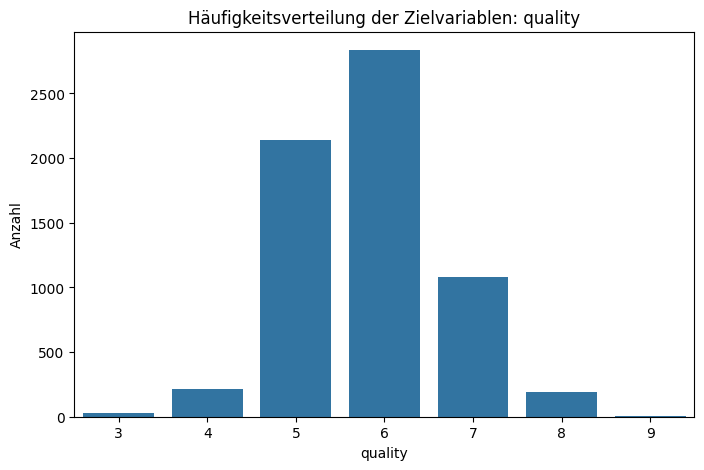

In [6]:
# Verteilung der Zielvariablen
def explore_target_variable(data, target_column):
    try:
        if target_column not in data.columns:
            raise ValueError(f"Die Zielvariable '{target_column}' existiert nicht im Datensatz.")
        
        print(f"\nVerteilung der Zielvariablen ({target_column}):")
        quality_counts = data[target_column].value_counts()
        display(quality_counts)
        
        plt.figure(figsize=(8, 5))
        sns.countplot(x=target_column, data=data)
        plt.title(f"Häufigkeitsverteilung der Zielvariablen: {target_column}")
        plt.xlabel(target_column)
        plt.ylabel("Anzahl")
        plt.show()
    except Exception as e:
        print(f"Fehler bei der Analyse der Zielvariablen: {e}")

if data is not None:
    explore_target_variable(data, 'quality')

## 2.6 Korrelationen berechnen


Korrelationen im Datensatz:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


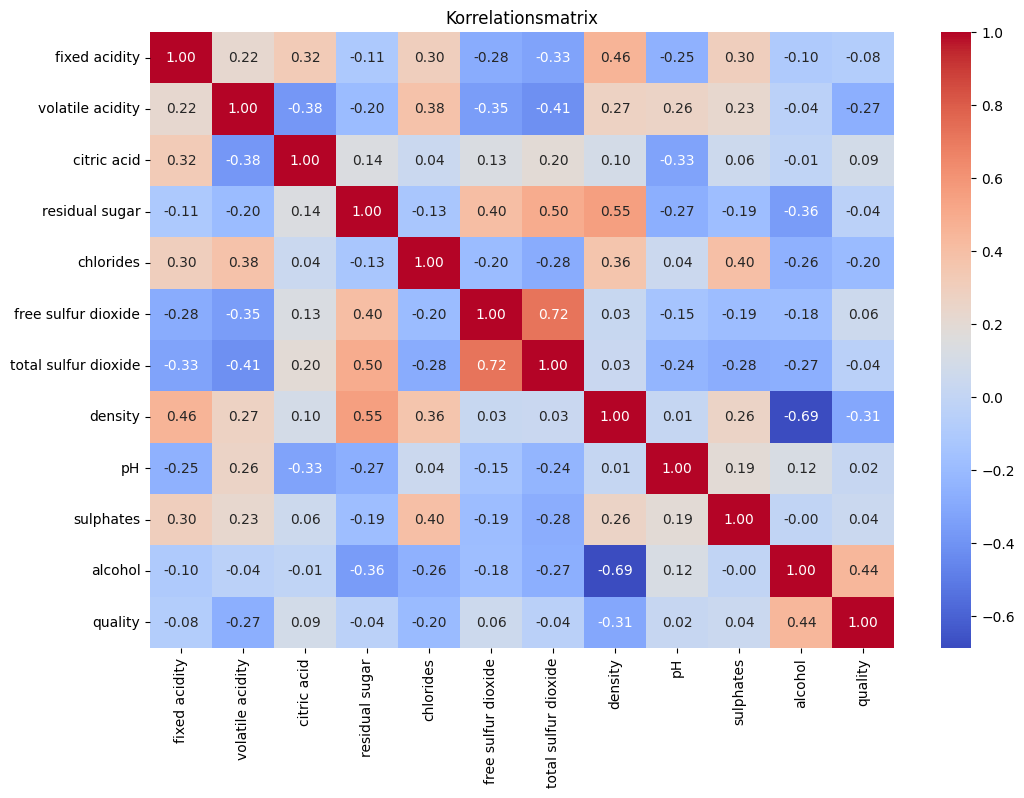

In [7]:
# Untersuchung von Korrelationen
def analyze_correlations(data):
    try:
        numerical_data = data.select_dtypes(include=[np.number])
        correlation_matrix = numerical_data.corr()
        
        print("\nKorrelationen im Datensatz:")
        display(correlation_matrix)
        
        # Visualisierung
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Korrelationsmatrix")
        plt.show()
    except Exception as e:
        print(f"Fehler bei der Analyse der Korrelationen: {e}")

if data is not None:
    analyze_correlations(data)


## 2.7 Fazit der explorativen Datenanalyse (EDA)
### 1) Allgemeine Eigenschaften des Datensatzes:

- Grösse des Datensatzes: Der Datensatz enthält 6497 Zeilen und 13 Spalten.
- Datenarten:
    - Numerische Variablen: 11 Spalten (z. B. fixed acidity, alcohol).
    - Kategoriale Variable: 1 Spalte (type).
- Es gibt keine fehlenden Werte, alle Felder sind vollständig.

### 2) Statistische Kennzahlen:

- Die Mittelwerte und Standardabweichungen der Variablen deuten auf eine heterogene Verteilung hin.
- Variablen wie residual sugar und total sulfur dioxide weisen große Streuungen auf (hohe Standardabweichungen).
- Extremwerte wurden beobachtet, z. B. für:
    - chlorides (Maximalwert: 0.611).
    - total sulfur dioxide (Maximalwert: 440).

### 3) Verteilung der Zielvariablen (quality):

- Die Qualität der Weine ist ungleich verteilt:
    - Mehrheit der Daten: quality = 5, 6, 7 (zusammen etwa 94% der Einträge).
    - Höhere Qualitätsstufen (quality > 7) und niedrigere (quality < 5) sind unterrepräsentiert.
- Dies deutet auf ein ungleichgewichtiges Klassenproblem hin, das für Modellierungsaufgaben berücksichtigt werden muss.

### 4) Korrelationen:

- Die stärksten Korrelationen zur Zielvariable quality:
    - Positive Korrelation: alcohol (+0.44), was auf einen möglichen Zusammenhang zwischen Alkoholgehalt und Qualität hindeutet.
    - Negative Korrelation: volatile acidity (-0.27) und density (-0.31), die niedrigere Qualitätswerte mit höheren Konzentrationen verbinden könnten.
- Die meisten anderen Variablen zeigen nur schwache Korrelationen zur Zielvariable.

### 5) Besondere Beziehungen:

- residual sugar zeigt eine moderate positive Korrelation mit density (+0.55), was erwartet wird.
- free sulfur dioxide und total sulfur dioxide korrelieren stark miteinander (+0.72), was auf einen direkten Zusammenhang hinweist.

## 2.8 Next Step:
- Unifying & Transformation: Datentypen und Formate analysieren und bei Bedarf vereinheitlichen,
Daten sinnvoll zusammenführen